In [5]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
import cufflinks as cf

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()


### Basics

<AxesSubplot:>

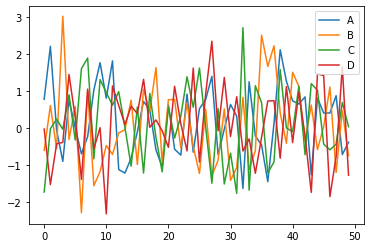

In [11]:
np_data=np.random.randn(50,4)
data=pd.DataFrame(np_data,columns=['A','B','C','D'])
data.head()
data.plot()      # Pandas inbuilt plot

In [12]:
data.iplot()   # pandas interactive plot

### Line plots

In [15]:
import plotly.graph_objects as go     # Use for more customize plots.
st_data=px.data.stocks()

In [16]:
st_data

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [20]:
# px.line(st_data,x='date',y='GOOG',labels={'x':'Dates','y':'Price'})
px.line(st_data,x='date',y=['GOOG','AMZN'],labels={'x':'Dates','y':'PRICE'},title="GOOGLE vs AMAZON")

In [44]:
fig=go.Figure()       # For separte design of each columns(OR line plots)
fig.add_trace(go.Scatter(x=st_data.date,y=st_data.GOOG,
                        mode='lines',name='GOOGLE'))
fig.add_trace(go.Scatter(x=st_data.date,y=st_data.AMZN,
                        mode='lines+markers',name='AMAZON'))
fig.add_trace(go.Scatter(x=st_data.date,y=st_data.AAPL,
                        mode='lines+markers',name='APPLE',
                        line=dict(color='firebrick',width=2,
                                 dash='dashdot')))



### Bar Charts

In [50]:
df_us=px.data.gapminder().query("country=='United States' ")
px.bar(df_us,x='year',y='pop')

In [58]:
df_tips=px.data.tips()
px.bar(df_tips,x='day',y='tip',color='sex',title='Tips by sex on each day',
      labels={'tip':'Tip Amount','day':'MyDay'})
# px.bar(df_tips,x='sex',y='total_bill',color='smoker',barmode='group')  # barmode use for sideby side bar

In [82]:
df_eru=px.data.gapminder().query("continent == 'Europe' and year== 2007 and pop > 2.e6")
fig=px.bar(df_eru,y='pop',x='country',text='pop',color='country')
fig

In [84]:
## Change xaxis names and values.
fig.update_traces(textposition='outside',texttemplate='%{text:.2s}')
fig.update_layout(uniformtext_minsize=8,xaxis_tickangle=-45)

### ScatterPlots

In [85]:
df_iris=px.data.iris()
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [93]:
px.scatter(df_iris,x='sepal_width',y='sepal_length',color='species',size='petal_length',hover_data=['petal_width'])

In [102]:
fig=go.Figure()
fig.add_traces(go.Scatter(
x=df_iris.sepal_width,y=df_iris.sepal_length,mode='markers',
marker_color=df_iris.sepal_width,text=df_iris.species,marker=dict(showscale=True)
)
)

### Pie Charts

In [127]:
df_asia=px.data.gapminder().query("year==2007 and continent=='Asia' ")

In [128]:
px.pie(df_asia,values='iso_num',names='country',title='Populations')

### Box Plots

In [131]:
px.box(df_tips,x='sex',y='tip',points='all')

In [134]:
px.box(df_tips,x='day',y='tip',points='all', color='sex')

### Map Scatter pots

In [139]:
df_map=px.data.gapminder().query("year==2007")
df_map

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [162]:
fig=px.scatter_geo(df_map,locations='iso_alpha',color='continent',hover_name='country',
                  size='pop',projection='orthographic')
fig